# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

In [1]:
# Install the Kaggle package
!pip install kaggle 
!pip install tmdbv3api
!pip install ipycytoscape

import json
import requests
import pandas as pd
import seaborn as sns
import networkx as nx
import ipycytoscape
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from tmdbv3api import TMDb, Movie
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [2]:
def get_titles_and_votes(url):
    # Get html
    html_content = requests.get(url).text
    # Create BeautifulSoup object
    soup = BeautifulSoup(html_content, "html.parser")
    # Define list to store titles and votes
    titles_votes = []
    # Loop over each athing object in html
    for athing in soup.find_all("tr", {"class": "athing"}):
        # Get id
        athing_id = athing.attrs["id"]
        # Get title
        athing_title = athing.find("span", {"class": "titleline"}).find('a').text
        # Get votes element
        athing_score = soup.find("span", {"id": f"score_{athing_id}"})
        # Get votes
        athing_score = 0 if athing_score is None else athing_score.text.split(" ")[0]
        # Append title, votes and id
        titles_votes.append((athing_id, athing_title, athing_score))
    # Retrun dataframe of title, votes and id
    return pd.DataFrame(titles_votes, columns=["id", "title", "votes"])

# Get title and votes for page
get_titles_and_votes("https://news.ycombinator.com/")

,id,title,votes
0,35424807,Ask HN: Who is hiring? (April 2023),90
1,35421034,The Mullvad Browser,705
2,35426482,Launch HN: OutSail (YC W23) – Wingsails to red...,24
3,35424678,Alibaba breaks itself up in six,157
4,35421962,We're Knot Friends,53
5,35424805,Ask HN: Who wants to be hired? (April 2023),28
6,35420553,Near-lossless image formats using ultra-fast L...,120
7,35426679,Why MMAP in llama.cpp hides true memory usage,18
8,35423569,Pandas 2.0,170
9,35401126,Can water solve a maze? [video],276


**Question 2**:  Write a function that collects data on four Marvel movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [3]:
# Create TMDb object
tmdb = TMDb()
tmdb.api_key = 'api-key'
tmdb.language = 'en'

def get_movies_info(search_term = "Marvel", num_movies=4):
    # Get serach term results
    search = Movie().search(search_term)
    # Sort them by popularity
    search = sorted(search, key=lambda d: d['popularity'], reverse=True)
    # Return results
    return pd.DataFrame([(movie.title, movie.overview, movie.vote_average) for movie in search[:num_movies]], columns=["name", "overview", "average score"])

get_movies_info()

,name,overview,average score
0,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",7.304
1,Captain Marvel,The story follows Carol Danvers as she becomes...,6.868
2,Pokémon the Movie: Volcanion and the Mechanica...,Ash meets the Mythical Pokémon Volcanion when ...,6.674
3,The Marvels,"Carol Danvers, Monica Rambeau, and Kamala Khan...",0.000


## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

**Note:** Use ks-projects-201801.csv data

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [4]:
# which question to answer - put your ID number and run the code 
your_id  = "208373365"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 3 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

In [5]:
# Define personal API-Key details 
api_token = {"username":"","key":""}
# Create kaggle.json file with the personal API-Key details 
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
# Download csv
!kaggle datasets download kemical/kickstarter-projects -f ks-projects-201801.csv
!unzip ks-projects-201801.csv.zip
# Read data
ks = pd.read_csv("ks-projects-201801.csv")
ks["usd pledged"].fillna(0.0, inplace=True)
ks["name"].fillna("", inplace=True)
# Get value count for each month
months_values = pd.to_datetime(ks["launched"]).map(lambda x: x.month).value_counts()
# Print lowest number of projects month
lowest_month = months_values[months_values == months_values.min()].index[0]
print(f"The month with the lowest number of projects is: {lowest_month}")

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ks-projects-201801.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ks-projects-201801.csv.zip
replace ks-projects-201801.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ks-projects-201801.csv  
The month with the lowest number of projects is: 12


**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

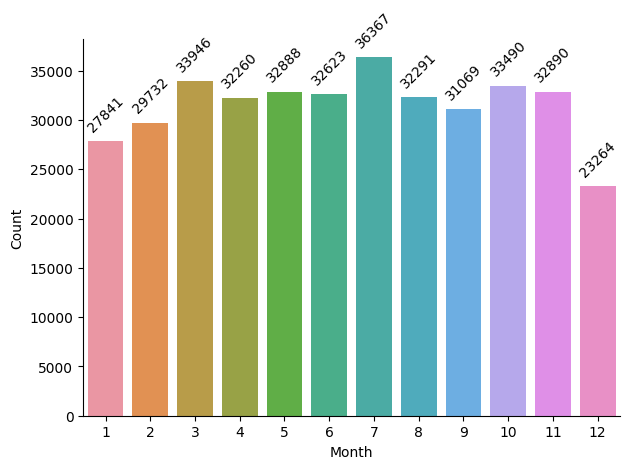

In [6]:
# Get months
months = pd.to_datetime(ks["launched"]).map(lambda x: x.month)
# Create countplot
ax = sns.countplot(data=months, x=months.index)
# Add counts
ax.bar_label(ax.containers[0], rotation=45, padding = 5)
# Change labels
plt.xlabel("Month")
plt.ylabel("Count")
# Remove frame
sns.despine()
# Show plot
plt.tight_layout()
plt.show()

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  **Pandas**, please answer the following questions:

**Question 1:** Write code which calculate the top-20 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [7]:
# Download csv
!kaggle datasets download -d csanhueza/the-marvel-universe-social-network
!unzip the-marvel-universe-social-network.zip
# Read data
hero_network = pd.read_csv("hero-network.csv")
# Make sure order doesnt matter
hero_network_tmp = hero_network.copy()
hero_network_tmp.rename(columns={"hero1": "hero2", "hero2": "hero1"})
new_hero_network = pd.concat([hero_network, hero_network_tmp]).drop_duplicates()
# Get most friendly_characters
most_friendly_characters = new_hero_network.groupby("hero1").count().sort_values('hero2', ascending=False)
# Print top-20 most friendly characters
print(f"Top-20 most friendly characters:\n {most_friendly_characters.head(20)}")

the-marvel-universe-social-network.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  the-marvel-universe-social-network.zip
replace edges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: edges.csv               
  inflating: hero-network.csv        
  inflating: nodes.csv               
Top-20 most friendly characters:
                       hero2
hero1                      
CAPTAIN AMERICA        1426
SPIDER-MAN/PETER PAR   1286
IRON MAN/TONY STARK    1132
WOLVERINE/LOGAN        1036
SCARLET WITCH/WANDA    1004
THING/BENJAMIN J. GR   1003
HUMAN TORCH/JOHNNY S    962
MR. FANTASTIC/REED R    957
THOR/DR. DONALD BLAK    947
VISION                  919
INVISIBLE WOMAN/SUE     919
BEAST/HENRY &HANK& P    918
HAWK                    880
CYCLOPS/SCOTT SUMMER    812
HULK/DR. ROBERT BRUC    802
WASP/JANET VAN DYNE     778
DR. STRANGE/STEPHEN     777
ANT-MAN/DR. HENRY J.    775
STORM/ORORO MUNROE S    771
COLOSSUS II/PETER RA    760


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

Nodes:150 Edges:14809


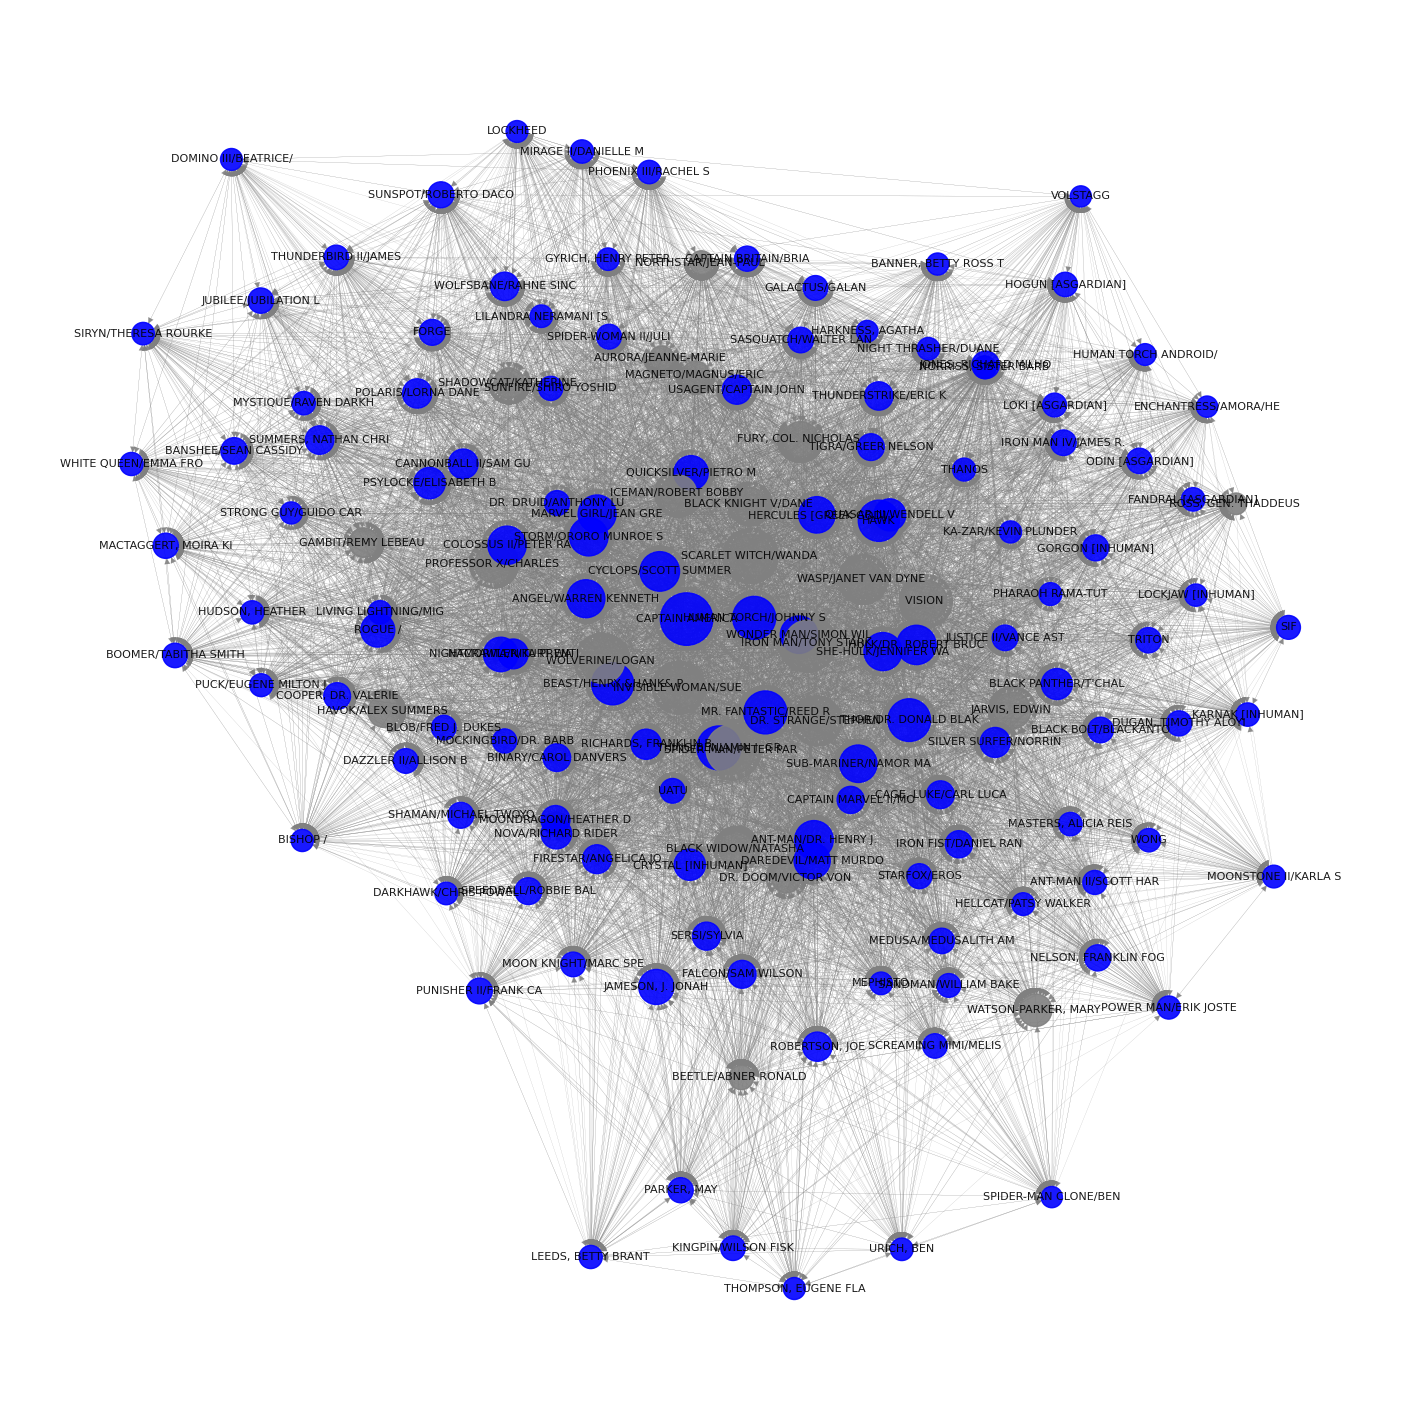

In [8]:
# Get most friendly characters top 150
top_most_friendly_characters = most_friendly_characters.head(150)
# Get names of heros for network
characters_to_plot = top_most_friendly_characters.index.to_list()
# Get connections for network
network_to_plot = new_hero_network[(new_hero_network.hero1.isin(characters_to_plot)) & (new_hero_network.hero2.isin(characters_to_plot))]

# Read nodes csv
nodes_df = pd.read_csv("nodes.csv")

# Define verticies
verticies = set(characters_to_plot)
# Define links
links = list(zip(network_to_plot.hero1, network_to_plot.hero2))
# Create graph
g = nx.DiGraph()
# Add edges
g.add_edges_from(set(links))
# Print graph
print(f"Nodes:{g.number_of_nodes()} Edges:{g.number_of_edges()}")

# Defin lists to store nodes size and color
nodes_size = []
node_colors = []
# Loop over nodes
for node in g.nodes(data=True):
  # Add node size
  nodes_size.append(top_most_friendly_characters.loc[node[0]].hero2)
  # Add node color
  if node[0] not in nodes_df.node.to_list():
    node_colors.append('gray')
  elif nodes_df[nodes_df.node==node[0]].type.values[0] == "comic":
      node_colors.append('green')
  elif nodes_df[nodes_df.node==node[0]].type.values[0] == "hero":
      node_colors.append('blue')
  else:
      raise Exception (f'Unknown type for {node[0]}')

# Show network
plt.figure(3,figsize=(14,14))
nx.draw(g, with_labels=True, node_size=nodes_size, node_color=node_colors, font_size=8,edge_color='gray', width=0.1, alpha=0.9)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) or [D3](https://d3js.org) (10pt)

In [9]:
# Gephi
nx.write_gexf(g, "Gephi_graph.gexf")
files.download('Gephi_graph.gexf')

In [ ]:
# Cytoscape 
cytoscapeobj = ipycytoscape.CytoscapeWidget()
cytoscapeobj.graph.add_graph_from_networkx(g)